In [5]:
!pip install scikit-learn  # si ya tienes anaconda ya está

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%matplotlib inline

In [2]:
import sklearn

In [3]:
import pandas as pd

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [57]:
from sklearn.model_selection import KFold

In [5]:
iris = load_iris()
iris_data = iris.data

In [6]:
iris_targets = iris.target

In [7]:
iris_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
import numpy as np

In [9]:
datos_planta = pd.DataFrame(columns=["A", "B", "C", "D", "Target"], data=np.hstack(tup=(iris_data, iris_targets.reshape(-1,1))))
datos_planta

,A,B,C,D,Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


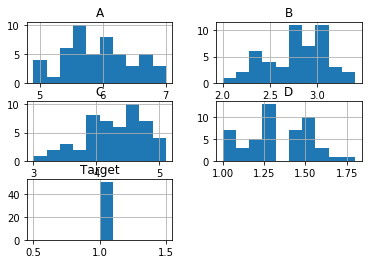

In [10]:
_,_,_=datos_planta.loc[datos_planta.Target == 1].hist()

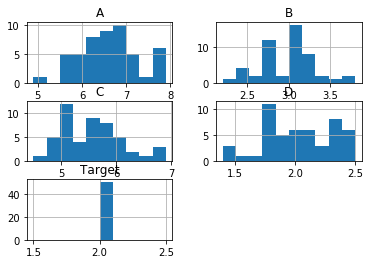

In [11]:
_,_,_=datos_planta.loc[datos_planta.Target == 2].hist()

In [12]:
st = StandardScaler()

# Preprocesamiento de los datos

- Acoplar datos (amplificación)
- Filtros en frecuencia (low, high, bandpass, reject, notch) o espaciales.
- normalizacion, estandarización.

### normalizacion

In [13]:
valores = st.fit_transform(datos_planta[["A", "B", "C", "D"]])
valores_normalizados = pd.DataFrame(columns=["A", "B", "C", "D", "Targets"], data=np.hstack(tup=(valores, iris_targets.reshape(-1,1))))

In [14]:
valores_normalizados

,A,B,C,D,Targets
0,-0.900681,1.032057,-1.341272,-1.312977,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,0.0
5,-0.537178,1.957669,-1.170675,-1.050031,0.0
6,-1.506521,0.800654,-1.341272,-1.181504,0.0
7,-1.021849,0.800654,-1.284407,-1.312977,0.0
8,-1.748856,-0.356361,-1.341272,-1.312977,0.0
9,-1.143017,0.106445,-1.284407,-1.444450,0.0


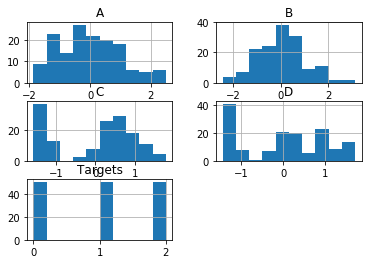

In [33]:
_ = valores_normalizados.hist()

In [34]:
# Demostrativo imagenes

In [ ]:
Validación:
- Hold-out
- K Cross Fold Validation
- Leave One Out
- Bootstrap

In [38]:
cols = valores_normalizados.columns
cols

Index(['A', 'B', 'C', 'D', 'Targets'], dtype='object')

In [40]:
valores_normalizados[cols[:4]]

,A,B,C,D
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


# HOLD OUT
- Se separó el banco de datos en entrenamiento y prueba

In [41]:
train_test_split?

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(valores_normalizados[cols[:4]], valores_normalizados.Targets.tolist(), test_size=0.3)

In [56]:
print("tamaño de banco entrenamiento ", len(xtrain), "tamaño banco pruebas ", len(xtest))

tamaño de banco entrenamiento  105 tamaño banco pruebas  45


In [63]:
knn = KNeighborsClassifier(n_neighbors=8, n_jobs=2)

In [64]:
knn.fit(X=xtrain, y=ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=8, p=2,
           weights='uniform')

# Score de entrenamiento
- Evaluacion de memoria del clasificador. ¿Qué tantas muestras de entrenamiento reconoce?

In [69]:
knn.score(X=xtrain, y=ytrain)

0.96190476190476193

# Score de prueba
- Evaluacion en muestras no conocidas. Aquí si puede haber overfitting

In [71]:
knn.score(X=xtest, y=ytest)

0.93333333333333335

# Cargando una imagen

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
cd ~/Imágenes/wallpapers

/home/ramondeb/Imágenes/wallpapers


In [22]:
ima = Image.open("blue-marble-west.jpg")

In [23]:
import numpy as np

In [24]:
array = np.array(ima)

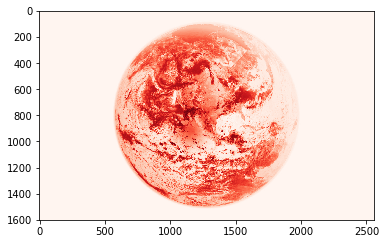

In [25]:
plt.imshow(array[:,:,0], cmap="Reds")

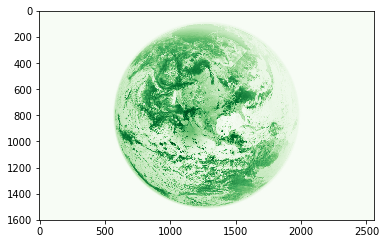

In [26]:
plt.imshow(array[:,:,1], cmap="Greens")

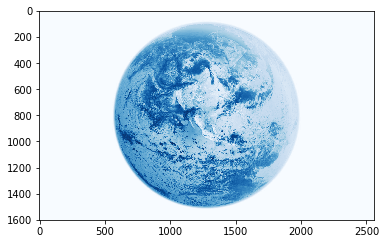

In [27]:
plt.imshow(array[:,:,2], cmap="Blues")

In [28]:
for capa in range(3):
    print("minimo", array[:, :, capa].min(), "maximo ", array[:, :, capa].max())

minimo 0 maximo  255
minimo 0 maximo  255
minimo 0 maximo  255


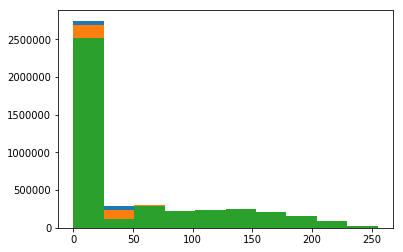

In [29]:
for capa in range(3):
    plt.hist(array[:, :, capa].ravel())